The recruitment landscape is constantly evolving, and keeping up with the influx of resumes can be a daunting task. Enter resume parsers, automated tools that extract key information from resumes and streamline the selection process. While traditional parsers often fall short in handling diverse formats and nuanced language, Gemini Pro, a powerful language model from Google, offers a promising solution.

This blog will guide you through the exciting world of building your own resume parser with Gemini Pro. Buckle up, job-hunting enthusiasts and tech-savvy individuals, as we dive into the code and explore the potential of this revolutionary tool!

## Why Gemini Pro?

Gemini Pro boasts several advantages that make it ideal for resume parsing:

* Natural Language Processing (NLP) prowess: It understands the context and intent behind words, making it adept at handling diverse writing styles and formats.
* Flexibility: Gemini Pro integrates seamlessly with various platforms and tools, allowing for easy deployment and integration.
* Decoder-only Transformer: Unlike traditional encoders that analyze input, Gemini Pro adopts a decoder-only architecture. This means it focuses on generating text based on the provided context, allowing for efficient processing and inference on specialized hardware like TPUs.

* Multimodal Capabilities: While many models handle text alone, Gemini Pro shines in its ability to process various formats, including text, code, and images. This is achieved by representing each modality in a unified space, enabling the model to understand and generate across different domains.

* Mixture of Experts (MoE): This innovative technique tackles the challenge of scaling large models efficiently. Essentially, MoE divides the model into smaller, specialized "expert" networks. Based on the input, only the relevant experts are activated, leading to significant performance gains and resource savings.

* Scalability and Efficiency: Gemini Pro is designed for scalability. Its architecture allows for easy distribution across multiple machines, enabling it to handle large datasets and complex tasks. Additionally, MoE contributes to efficient processing and inference, making it suitable for real-world applications.

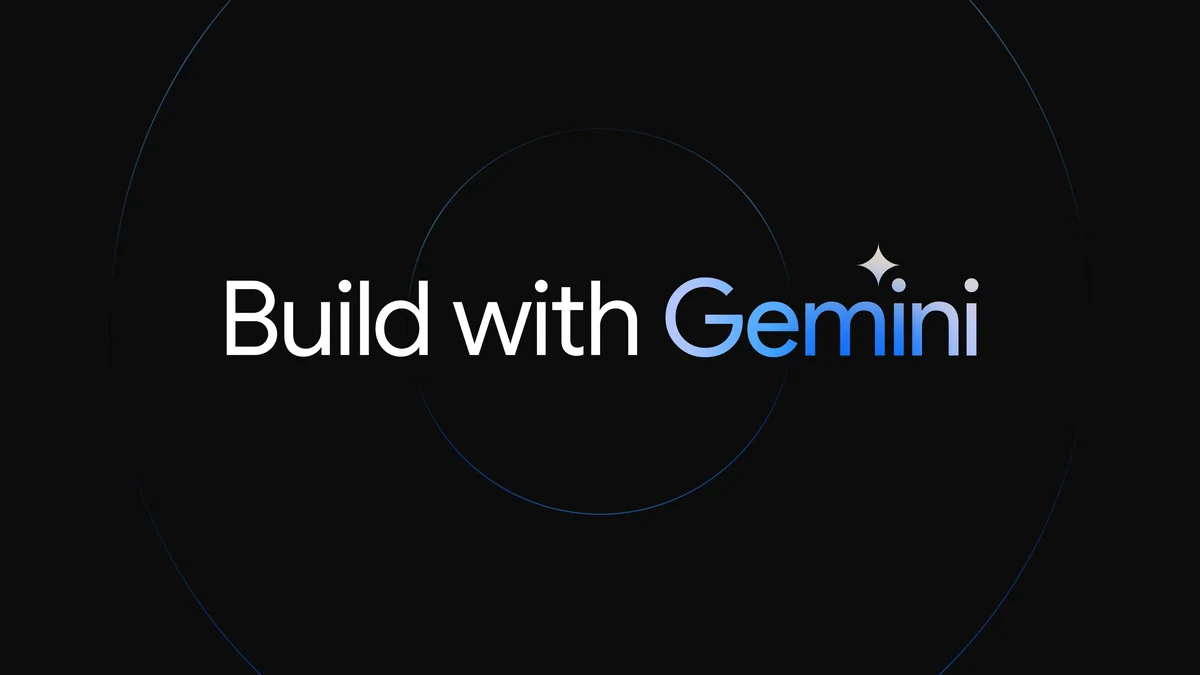

## Install and Imports
We will use the PyPDF2 library for reading the resume pdfs and the gemini pro api for resume parsing

In [ ]:
!pip install PyPDF2 -q wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.4 MB/s eta 0:00:00


In [ ]:
import google.generativeai as genai
import os
import PyPDF2 as pdf
import json

In [ ]:
import wandb
wandb.login(key='WRITE_YOUR_WANDB_API_KEY')
# start logging a wandb run
run = wandb.init(project="gemini resume")

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: tensorgirl. Use `wandb login --relogin` to force relogin


## Model Config
To use the Gemini Pro model we will need a google ai api.

In [ ]:
genai.configure(api_key="WRITE_YOUR_API_KEY")

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


Now we will setup our model function and the pdf loader function.

In [ ]:
def get_gemini_repsonse(input):
    model=genai.GenerativeModel('gemini-pro')
    response=model.generate_content(input)
    return response.text

def input_pdf_text(uploaded_file):
    reader=pdf.PdfReader(uploaded_file)
    text=""
    for page in range(len(reader.pages)):
        page=reader.pages[page]
        text+=str(page.extract_text())
    return text

## Generate the Prompt
We will now generate the prompt for the input to our Gemini Model which will consist of the instructions, resume text and the job description.

In [ ]:
#Prompt Template

input_prompt="""
Hey Act Like a skilled or very experience ATS(Application Tracking System)
with a deep understanding of tech field,software engineering,data science ,data analyst
and big data engineer. Your task is to evaluate the resume based on the given job description.
You must consider the job market is very competitive and you should provide
best assistance for improving thr resumes. Assign the percentage Matching based
on Jd and
the missing keywords with high accuracy
resume:{text}
description:{jd}

I want the response as per below structure
{{"JD Match": "%",
"MissingKeywords": [],
"Profile Summary": ""}}
"""

In [ ]:
jd = 'Machine Learning Engineer'
text=input_pdf_text('resume3.pdf')
response=get_gemini_repsonse(input_prompt)

In [ ]:
response

'{{\n "JD Match": "80%",\n "MissingKeywords": ["Cloud Computing", "Machine Learning Algorithms", "Data Visualization Techniques"],\n "Profile Summary": "The candidate has a strong academic background in Data Science, Machine Learning, and Big Data, with a Ph.D. from a reputable university. They have demonstrated experience in applying their knowledge to real-world problems through their work in various projects, including developing predictive models for fraud detection and customer churn. Their research on data mining techniques and natural language processing further showcases their expertise in the field. However, to improve their match with the job description, they need to include more keywords related to cloud computing, machine learning algorithms, and data visualization techniques in their resume."\n}}'

In [ ]:
table.add_data(text, jd, response)

In [ ]:
table = wandb.Table(columns=["Resume Text", "Job Description", "Response"])
 # Log prompt, response, and position

table.add_data(text, jd, response)
# Log the completed table and finish
wandb.log({"responses": table})
wandb.finish()


### Demo

You can head out to the live demo at this [huggingface space](https://huggingface.co/spaces/tensorgirl/gemini_resume_parser).


## References

https://wandb.ai/onlineinference/Gemini/reports/Getting-Started-With-Gemini-Pro-In-Python--Vmlldzo2MjU3OTQz

 https://ai.google.dev/?gad_source=1&gclid=CjwKCAiA_tuuBhAUEiwAvxkgTll-0qseWb7USrjIVWEKxnfLznh-KOHuTtEtgbJc8MadU21FaMmH1RoCbQoQAvD_BwE